In [4]:
import dataloaders
import utils
import numpy as np

# Simple

100%|██████████| 10000/10000 [00:00<00:00, 33922.92it/s]


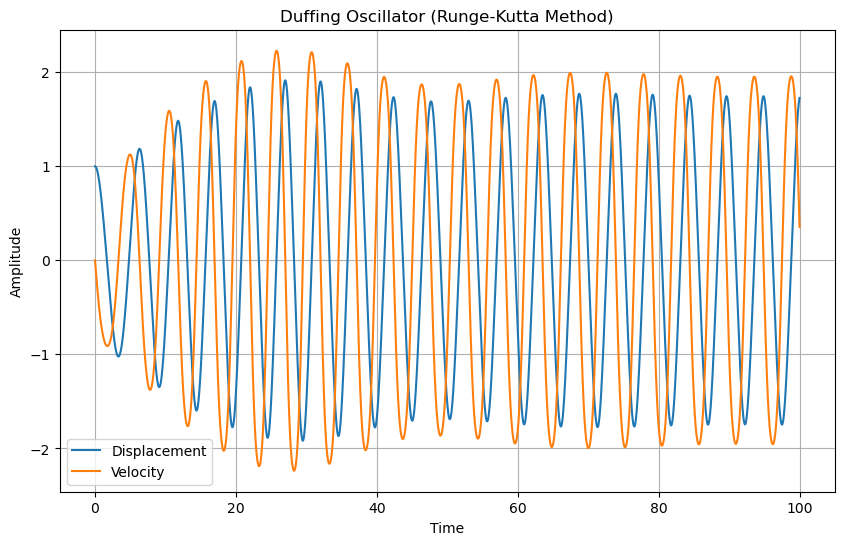

In [2]:
# Parameters
δ = 0.1    # Damping coefficient
α = 1.0    # Linear stiffness coefficient
β = 0.25   # Non-linear stiffness coefficient
γ = 0.3    # Amplitude of the external driving force
ω = 1.2    # Angular frequency of the external driving force

# Initial conditions
x0 = 1.0   # Initial displacement
v0 = 0.0   # Initial velocity

# Time span for integration
t_span = (0, 100)
dt = 0.01
time, displacement, velocity = dataloaders.runge_kutta_solve(δ, α, β, γ, ω, x0, v0, t_span, dt)

import matplotlib.pyplot as plt
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, displacement, label="Displacement")
plt.plot(time, velocity, label="Velocity")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Duffing Oscillator (Runge-Kutta Method)")
plt.legend()
plt.grid(True)
plt.show()


# Multiple

In [5]:
# Parameters and initial conditions for three different behaviors
params_sets = [
    {"δ": 0.3,      "α": -1.0, "β": 1,     "γ": 0.20, "ω": 1.2, "x0": 0.5, "v0": 0.0,    'dt' : 0.01,"t_span": (0, 100000)},
    # {"δ": 0.3,      "α": -1.0, "β": 1,     "γ": 0.28, "ω": 1.2, "x0": 0.5, "v0": 0.0,    'dt' : 0.01,"t_span": (0, 100)},
    # {"δ": 0.3,      "α": -1.0, "β": 1,     "γ": 0.29, "ω": 1.2, "x0": 0.5, "v0": 0.0,    'dt' : 0.01,"t_span": (0, 100)},
    # {"δ": 0.3,      "α": -1.0, "β": 1,     "γ": 0.37, "ω": 1.2, "x0": 0.5, "v0": 0.0,    'dt' : 0.01,"t_span": (0, 100)},
    # {"δ": 0.3,      "α": -1.0, "β": 1,     "γ": 0.50, "ω": 1.2, "x0": 0.5, "v0": 0.0,    'dt' : 0.01,"t_span": (0, 100)},
    # {"δ": 0.3,      "α": -1.0, "β": 1,     "γ": 0.65, "ω": 1.2, "x0": 0.5, "v0": 0.0,    'dt' : 0.01,"t_span": (0, 100)},
]

# Solve and plot for each parameter set
for i, params in enumerate(params_sets):
    dataloaders.solve_and_plot(save_npz=True,**params)


100%|██████████| 10000000/10000000 [04:48<00:00, 34703.03it/s]


# 3D PhaseSpace

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Parameters
δ = 0.3    # Damping coefficient
α = -1.0    # Linear stiffness coefficient
β = 1   # Non-linear stiffness coefficient
ω = 1.2    # Angular frequency of the external driving force

γ = 0.5    # Amplitude of the external driving force

# Initial conditions
x0 = 1.0   # Initial displacement
v0 = 0.0   # Initial velocity

t_span = (0, 500)
dt = 0.01

# Numerically solve the Duffing equation using Runge-Kutta method
time,x, v = dataloaders.runge_kutta_solve(δ, α, β, γ, ω, x0, v0, t_span, dt)


#######################################################################################################################
#######################################################################################################################
time = np.cos(ω*time)
#######################################################################################################################
#######################################################################################################################


# Create a 3D phase space plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, v, time, c=time, cmap='plasma', label="Phase Space Trajectory")
ax.set_xlabel("Displacement (x)")
ax.set_ylabel("Velocity (v)")
ax.set_zlabel("Time")
ax.set_title("3D Phase Space of the Duffing Oscillator")
ax.legend()
ax.grid(True)

# Add a colorbar
cbar = fig.colorbar(sc, label="Time")





def update(angle):
    ax.view_init(elev=10, azim=angle)

# Create the animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 5), interval=200)


# To save the animation as a video, you can use the following:
ani.save("3d_phase_space_animation.gif", writer="ffmpeg", dpi=300)

# To display the animation, you may use plt.show() or save it as a video file
# Show the 3D plot
plt.show()